In [1]:
import sys
!{sys.executable} -m pip install PyAthena

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
from pyathena import connect
import pandas as pd
conn = connect(s3_staging_dir='s3://nyctaxitrips-s3bucket-initials-ruiliang/trip_athena_result/',
               region_name='us-east-1')

df = pd.read_sql('SELECT * FROM "ticketdata"."nfl_stadium_data"  order by stadium limit 10;', conn)
df


,stadium,seating_capacity,location,surface,roof,team,opened,sport_location_id
0,AT&T Stadium,+8.0000000000000000e+04,"""Arlington","Texas""",Matrix RealGrass artificial turf,Retractable,None,2009
1,Arrowhead Stadium,+7.6416000000000000e+04,"""Kansas City","Missouri""",Latitude 36 Bermuda Grass,Open,None,1972
2,Bank of America Stadium,+7.5419000000000000e+04,"""Charlotte","North Carolina""",Voyager Bermuda Grass,Open,None,1996
3,CenturyLink Field,+6.8000000000000000e+04,"""Seattle","Washington""",FieldTurf Revolution,Open,None,2002
4,EverBank Field,+6.7246000000000000e+04,"""Jacksonville","Florida""",Tifway 419 Bermuda Grass,Open,None,1995
5,FedExField,+8.2000000000000000e+04,"""Landover","Maryland""",Latitude 36 Bermuda Grass,Open,None,1997
6,FirstEnergy Stadium,+6.7431000000000000e+04,"""Cleveland","Ohio""",Kentucky Bluegrass,Open,None,1999
7,Ford Field,+6.5000000000000000e+04,"""Detroit","Michigan""",FieldTurf Classic HD,Fixed,None,2002
8,Georgia Dome,+7.1250000000000000e+04,"""Atlanta","Georgia""",FieldTurf Classic HD,Fixed,None,1992
9,Gillette Stadium,+6.6829000000000000e+04,"""Foxborough","Massachusetts""",FieldTurf Revolution,Open,None,2002


In [3]:
df = pd.read_sql('SELECT sport,                  \
                 event_date_time,                \
                 home_team,away_team,            \
                     city,                       \
                     count(*) as tickets,        \
                     sum(ticket_price) as total_tickets_amt,           \
                     avg(ticket_price) as avg_ticket_price,            \
                     max(ticket_price) as max_ticket_price,            \
                     min(ticket_price) as min_ticket_price             \
                 FROM "ticketdata"."sporting_event_ticket_info" \
                 group by 1,2,3,4,5                                    \
                 order by 1,2,3,4,5 limit 1000;', conn)
df


,sport,event_date_time,home_team,away_team,city,tickets,total_tickets_amt,avg_ticket_price,max_ticket_price,min_ticket_price
0,baseball,2020-04-05 00:00:00,Atlanta Braves,Minnesota Twins,Atlanta Georgia,1760,54172.80,30.780000,32.40,25.92
1,baseball,2020-04-05 00:00:00,Baltimore Orioles,Chicago Cubs,Baltimore Maryland,1600,131104.00,81.940000,144.60,38.56
2,baseball,2020-04-05 00:00:00,Boston Red Sox,San Francisco Giants,Boston Massachusetts,1244,49573.40,39.850000,39.85,39.85
3,baseball,2020-04-05 00:00:00,Cincinnati Reds,San Diego Padres,Cincinnati Ohio,1444,84019.14,58.185000,77.58,38.79
4,baseball,2020-04-05 00:00:00,Cleveland Indians,Los Angeles Angels,Cleveland Ohio,1128,65260.44,57.855000,77.14,38.57
...,...,...,...,...,...,...,...,...,...,...
395,football,2020-12-14 15:00:00,Seattle Seahawks,Jacksonville Jaguars,"Seattle, Washington",3504,108624.00,31.000000,31.00,31.00
396,football,2020-12-14 15:00:00,Tampa Bay Buccaneers,Houston Texans,"Tampa, Florida",3188,188235.46,59.045000,67.48,33.74
397,football,2020-12-14 15:00:00,Tampa Bay Buccaneers,Indianapolis Colts,"Tampa, Florida",3188,238111.72,74.690000,85.36,42.68
398,football,2020-12-14 15:00:00,Tampa Bay Buccaneers,Jacksonville Jaguars,"Tampa, Florida",3188,232644.30,72.975000,83.40,41.70


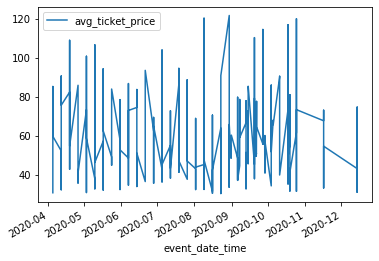

In [4]:
import matplotlib.pyplot as plt
df.plot(x='event_date_time',y='avg_ticket_price')